In [1]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
import scipy.stats

In [17]:
%matplotlib inline

In [18]:
file_path = r'D:\DATA C\Desktop\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [19]:
df = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df['date'] = pd.to_datetime(df.date, format = '%d.%m.%Y %H:%M:%S')
df.set_index('date', inplace = True)
df_1hr = df.resample('60min').mean()
df_1day = df.resample('1440min').mean()
# print(df)
date_mask = (df_1hr.index >= '2020-05-15') & (df_1hr.index < '2020-06-08')
date_mask2 = (df_1day.index > '2020-10-01') & (df_1day.index <= '2020-10-31')

In [20]:
SM_sensor1 = df_1hr['S1SM'].loc[date_mask]
SM_day_S1 = df_1day['S1SM'].loc[date_mask2]
# Temperature data
ST_sensor1 = df_1hr['S1Temp'].loc[date_mask]
ST_day_S1 = df_1day['S1Temp'].loc[date_mask2]

(array([18399., 18403., 18407., 18411., 18414., 18418., 18422.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

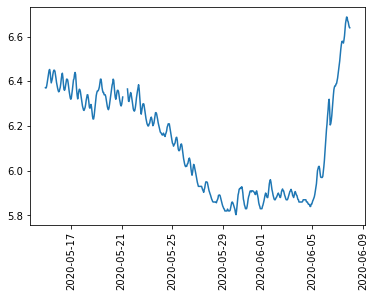

In [21]:
plt.plot(SM_sensor1)
plt.xticks(rotation= 90)

In [36]:
SM_sensor1.isnull().sum()

8

In [22]:
# Preparation of parameters for FFT analysis
date = SM_sensor1.index
soilmoisture = SM_sensor1.values

soiltemp = ST_sensor1.values

N = 24

# FFT Algorithms

In [29]:
# soiltemp_fft = sp.fftpack.fft(soiltemp)
# soiltemp_psd = np.abs(soiltemp_fft)**2
# fftfreq = sp.fftpack.fftfreq(len(soiltemp_psd), 1/N)

i = fftfreq > 0

In [30]:
soilmoisture_fft = sp.fftpack.fft(soilmoisture)
soilmoisture_psd = np.abs(soilmoisture_fft)**2
fftfre = sp.fftpack.fftfreq(len(soilmoisture_psd), 1/N)

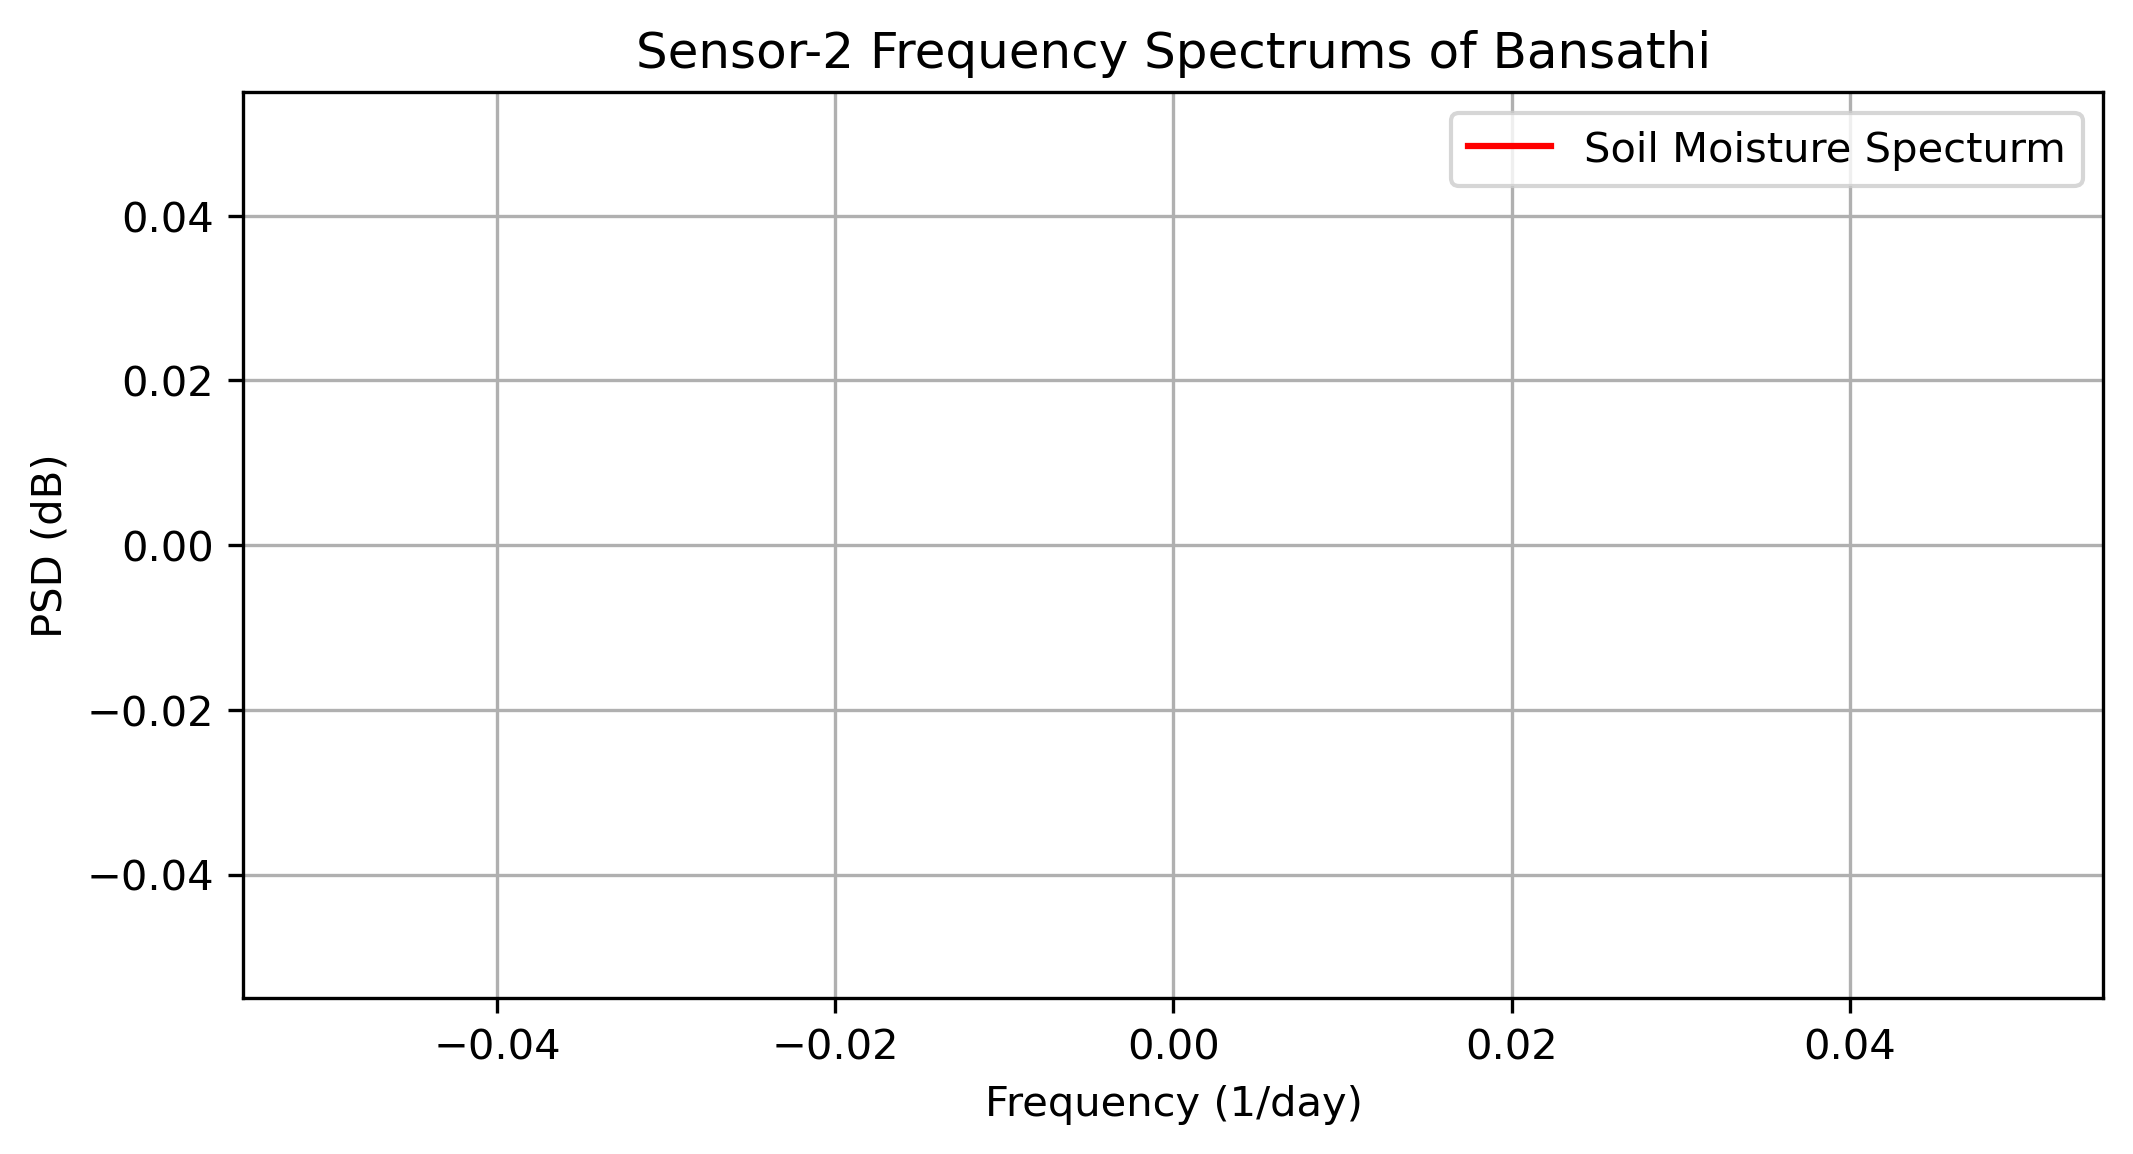

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi = 300)
ax.plot(fftfre[i], 10 * np.log10(soilmoisture_psd[i]), 'r-',
        label = 'Soil Moisture Specturm')
# ax.plot(fftfreq[i], 10 * np.log10(soiltemp_psd[i]), 'g--',
#         label = 'Soil Temperature Specturm')
# ax.set_xlim(0, 2)
ax.set_xlabel('Frequency (1/day)')
ax.set_ylabel('PSD (dB)')
ax.legend()
ax.set_title('Sensor-2 Frequency Spectrums of Bansathi')
plt.grid()
plt.show()